In [81]:
import numpy as np

np.random.seed(42)

true_p = 0.7 #(we are taking p)
data = np.random.binomial(1,true_p,10)

print("Observed coin tosses (1=Head, 0 = tail):")
print(data)
print("Number of heads:",data.sum())

Observed coin tosses (1=Head, 0 = tail):
[1 0 0 1 1 1 1 0 1 0]
Number of heads: 6


In [ ]:
# We are assuming coin toss as follows a Bernoulli distribution, P(X=1)=p,P(X=0)=1-p
# Log likelihood function for Bernoulli distribution
def log_likelihood(p,data):
    return np.sum(data*np.log(p) + (1 - data) * np.log(1 - p))

In [22]:
import matplotlib.pyplot as plt

p_values = np.linspace(0.01,0.99,100)
ll_values = [log_likelihood(p,data) for p in p_values]

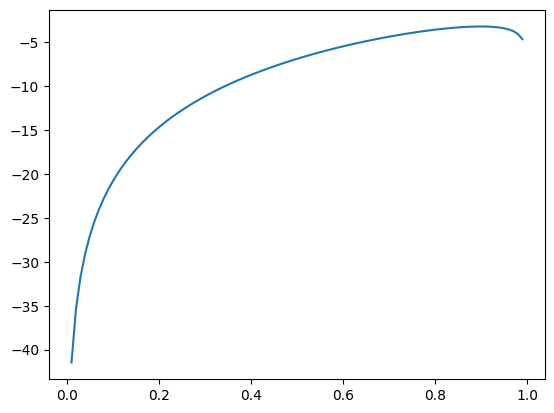

In [23]:
plt.plot(p_values,ll_values)

In [26]:
max_index = np.argmax(ll_values)
mle_p = p_values[max_index]
print("MLE estimate of :",mle_p)

MLE estimate of : 0.9009090909090909


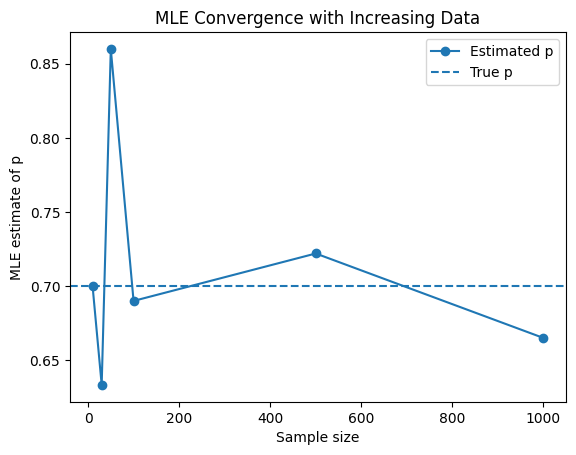

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# for reproducibility
np.random.seed(0)

true_p = 0.7
sample_size = [10, 30, 50, 100, 500, 1000]
p_mle_values = []

for n in sample_size:
    # generate Bernoulli samples
    data = np.random.binomial(1, true_p, size=n)

    # MLE for Bernoulli is the sample mean
    p_mle = data.mean()
    p_mle_values.append(p_mle)

# Plot
plt.plot(sample_size, p_mle_values, marker='o', label='Estimated p')
plt.axhline(y=true_p, linestyle='--', label='True p')

plt.xlabel('Sample size')
plt.ylabel('MLE estimate of p')
plt.title('MLE Convergence with Increasing Data')
plt.legend()
plt.show()


---

# Binomial

---

In [27]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

true_p = 0.7
n = 10          # number of trials
k = np.random.binomial(n, true_p)

print("Number of trials (n):", n)
print("Observed successes (k):", k)


Number of trials (n): 10
Observed successes (k): 7


In [28]:
def binomial_log_likelihood(p, k, n):
    return k * np.log(p) + (n - k) * np.log(1 - p)


In [30]:
p_values = np.linspace(0.01, 0.99, 100)
ll_values = [binomial_log_likelihood(p, k, n) for p in p_values]


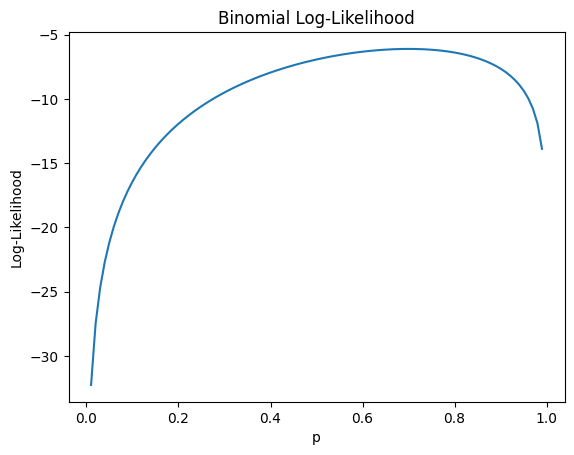

MLE estimate of p: 0.702929292929293
Closed-form MLE (k/n): 0.7


In [31]:
plt.plot(p_values, ll_values)
plt.xlabel("p")
plt.ylabel("Log-Likelihood")
plt.title("Binomial Log-Likelihood")
plt.show()

max_index = np.argmax(ll_values)
mle_p = p_values[max_index]

print("MLE estimate of p:", mle_p)
print("Closed-form MLE (k/n):", k / n)


In [33]:
np.random.seed(0)

true_p = 0.7
sample_sizes = [10, 30, 50, 100, 500, 1000]
p_mle_values = []

for n in sample_sizes:
    k = np.random.binomial(n, true_p)
    p_mle = k / n
    p_mle_values.append(p_mle)

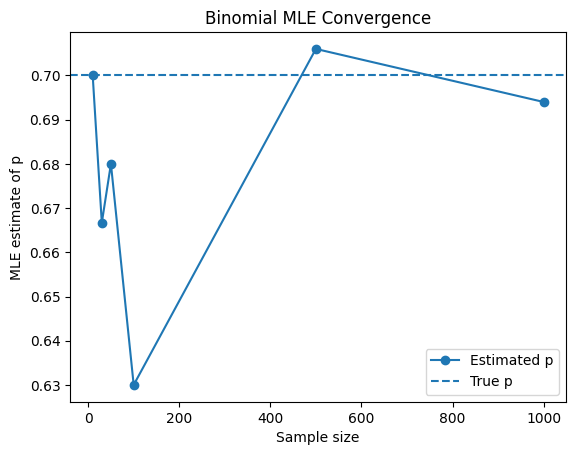

In [34]:
plt.plot(sample_sizes, p_mle_values, marker='o', label='Estimated p')
plt.axhline(y=true_p, linestyle='--', label='True p')

plt.xlabel('Sample size')
plt.ylabel('MLE estimate of p')
plt.title('Binomial MLE Convergence')
plt.legend()
plt.show()


---

# Normal Distribution

---

In [35]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

true_mu = 5
true_sigma = 2
n = 20

data = np.random.normal(true_mu, true_sigma, n)

print("Observed data:")
print(data)
print("Sample mean:", data.mean())


Observed data:
[8.24869073 3.77648717 3.9436565  2.85406276 6.73081526 0.39692261
 8.48962353 3.4775862  5.63807819 4.50125925 7.92421587 0.87971858
 4.35516559 4.23189129 7.26753888 2.80021747 4.65514358 3.24428316
 5.08442749 6.16563043]
Sample mean: 4.733270727078541


In [36]:
def normal_log_likelihood(mu, data, sigma):
    return -np.sum((data - mu)**2) / (2 * sigma**2)


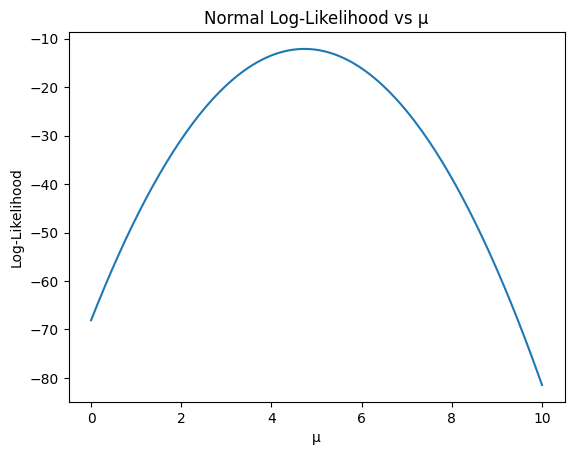

In [37]:
mu_values = np.linspace(0, 10, 200)
ll_values = [normal_log_likelihood(mu, data, true_sigma) for mu in mu_values]

plt.plot(mu_values, ll_values)
plt.xlabel("μ")
plt.ylabel("Log-Likelihood")
plt.title("Normal Log-Likelihood vs μ")
plt.show()


In [38]:
max_index = np.argmax(ll_values)
mle_mu = mu_values[max_index]

print("MLE estimate of μ:", mle_mu)
print("Closed-form MLE (sample mean):", data.mean())


MLE estimate of μ: 4.723618090452262
Closed-form MLE (sample mean): 4.733270727078541


In [39]:
np.random.seed(0)

true_mu = 5
true_sigma = 2
sample_sizes = [10, 30, 50, 100, 500, 1000]

mu_mle_values = []

for n in sample_sizes:
    data = np.random.normal(true_mu, true_sigma, n)
    mu_mle = data.mean()
    mu_mle_values.append(mu_mle)


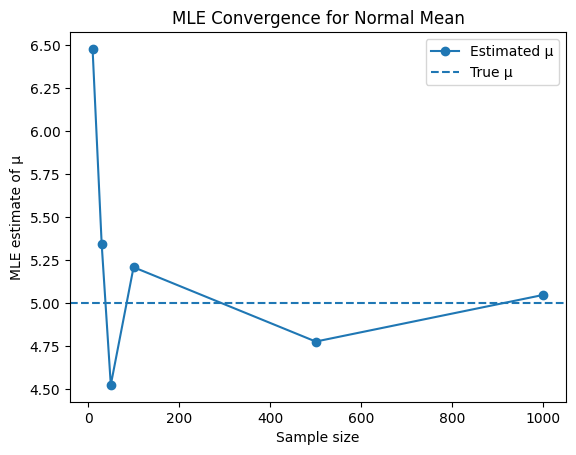

In [40]:
plt.plot(sample_sizes, mu_mle_values, marker='o', label='Estimated μ')
plt.axhline(y=true_mu, linestyle='--', label='True μ')

plt.xlabel("Sample size")
plt.ylabel("MLE estimate of μ")
plt.title("MLE Convergence for Normal Mean")
plt.legend()
plt.show()
